In [409]:
# Analysis of behaviour

In [535]:
import os
from utils import data_reader,
import scipy.io
from ggplot import *
import pandas as pd
import numpy as np
from math import *
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [536]:
# Test data:
'''
GenPath = os.getcwd()
Data_path = GenPath + '/data/'
Data_file = '2018-10-25_1_Mario_Block.mat'
'''

Data_path = '/mnt/c/Users/herny/Desktop/SWC/Data/Behavioural_Data/Mario/2018-10-25/1/'
Data_file = '2018-10-25_1_Mario_Block.mat'

mat = data_reader.mat_parser(Data_path + Data_file)

# Create a util function to parse the block.mat file within a specified folder, that returns a dictionary with the relevant info


In [537]:
mat.keys()

dict_keys(['__globals__', '__version__', '__header__', 'block'])

In [413]:
type(mat['block'])

numpy.ndarray

In [414]:
mat['block'].shape

()

In [415]:
mat['block'].dtype.fields

mappingproxy({'duration': (dtype('O'), 152),
              'endDateTime': (dtype('O'), 136),
              'endDateTimeStr': (dtype('O'), 144),
              'endStatus': (dtype('O'), 48),
              'events': (dtype('O'), 96),
              'expDef': (dtype('O'), 0),
              'expRef': (dtype('O'), 56),
              'experimentCleanupTime': (dtype('O'), 88),
              'experimentEndedTime': (dtype('O'), 80),
              'experimentInitTime': (dtype('O'), 64),
              'experimentStartedTime': (dtype('O'), 72),
              'inputs': (dtype('O'), 120),
              'outputs': (dtype('O'), 128),
              'paramsTimes': (dtype('O'), 112),
              'paramsValues': (dtype('O'), 104),
              'rigName': (dtype('O'), 24),
              'startDateTime': (dtype('O'), 32),
              'startDateTimeStr': (dtype('O'), 40),
              'stimWindowRenderTimes': (dtype('O'), 16),
              'stimWindowUpdateTimes': (dtype('O'), 8)})

In [416]:
mat['block'].dtype.names

('expDef',
 'stimWindowUpdateTimes',
 'stimWindowRenderTimes',
 'rigName',
 'startDateTime',
 'startDateTimeStr',
 'endStatus',
 'expRef',
 'experimentInitTime',
 'experimentStartedTime',
 'experimentEndedTime',
 'experimentCleanupTime',
 'events',
 'paramsValues',
 'paramsTimes',
 'inputs',
 'outputs',
 'endDateTime',
 'endDateTimeStr',
 'duration')

In [417]:
Main_name = mat['block']['expRef'][()]

In [418]:
events = mat['block']['events'][()]
outputs = mat['block']['outputs'][()]
inputs = mat['block']['inputs'][()]

In [419]:
type(events)

numpy.ndarray

In [420]:
inputs.dtype.fields

mappingproxy({'keyboardTimes': (dtype('O'), 40),
              'keyboardValues': (dtype('O'), 32),
              'lickTimes': (dtype('O'), 24),
              'lickValues': (dtype('O'), 16),
              'wheelTimes': (dtype('O'), 8),
              'wheelValues': (dtype('O'), 0)})

In [421]:
events.dtype.fields

mappingproxy({'Block_ModTimes': (dtype('O'), 104),
              'Block_ModValues': (dtype('O'), 96),
              'Condition_metTimes': (dtype('O'), 200),
              'Condition_metValues': (dtype('O'), 192),
              'GiveRewardTimes': (dtype('O'), 232),
              'GiveRewardValues': (dtype('O'), 224),
              'MovingAzimuthTimes': (dtype('O'), 136),
              'MovingAzimuthValues': (dtype('O'), 128),
              'TargetReachedTimes': (dtype('O'), 152),
              'TargetReachedValues': (dtype('O'), 144),
              'TimeDeltaTimes': (dtype('O'), 184),
              'TimeDeltaValues': (dtype('O'), 176),
              'TrialSideTimes': (dtype('O'), 120),
              'TrialSideValues': (dtype('O'), 112),
              'WrongReachedTimes': (dtype('O'), 168),
              'WrongReachedValues': (dtype('O'), 160),
              'endTrialTimes': (dtype('O'), 248),
              'endTrialValues': (dtype('O'), 240),
              'expStartTimes': (dtype('O'), 

In [422]:
outputs.dtype.fields

mappingproxy({'rewardTimes': (dtype('O'), 8), 'rewardValues': (dtype('O'), 0)})

In [423]:
data = [ list(events['MovingAzimuthValues'][()]), list(events['MovingAzimuthTimes'][()]) ]

In [424]:
# get data in a data frame for plotting
Behav_df = pd.DataFrame(data = data)
Behav_df = Behav_df.transpose()
Behav_df.columns = ['MovingAzimuthValues','MovingAzimuthTimes']

In [425]:
Behav_df

,MovingAzimuthValues,MovingAzimuthTimes
0,-0.0,-663540.712493
1,-0.0,-663540.651577
2,-0.0,-663540.569553
3,-0.0,-663540.426705
4,-0.0,-663540.277326
5,-0.0,-663539.828244
6,-0.0,-663539.773965
7,-0.0,-663539.609383
8,-0.0,-663539.555284
9,-0.0,-663539.463730


In [426]:
# get data about the side of the stimulus

TrialSide_df = pd.DataFrame(data = [ list(events['TrialSideTimes'][()]), list(events['TrialSideValues'][()]) ])
TrialSide_df = TrialSide_df.transpose()
TrialSide_df.columns = ['TrialSideTimes','TrialSideValues']
TrialSide_df['TrialSideVM'] = TrialSide_df['TrialSideValues'] * 80

In [427]:
TrialSide_df;

In [ ]:
fig = ggplot( aes(x='MovingAzimuthTimes', y='MovingAzimuthValues'), data = Behav_df ) \
        + geom_line() \
        + geom_line( aes(x='TrialSideTimes', y='TrialSideValues'), data = TrialSide_df ) \
        #+ geom_line(size=1,alpha=0.8) \
        #+ ggtitle("test") \
        #+ xlim(-509500, -509400) \
        #+ ylim(-5, 5)
fig

In [516]:
# define a function that returns only those indices of a binary! vector (0 or 1) where some values are first different than 0
def FirstDiffZero(array):
    # create a new vector that is the same but shifted
    # move everything one space forward
    newarray = np.concatenate((0,array), axis=None)[0:len(array)]
    difarray = array - newarray
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    #find which indexes are 1
    indexes = get_indexes(1, difarray)
    return indexes



In [517]:
# test the function
myarray = [0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,0,0,1] #result should be [3,7,12,17]

FirstDiffZero(myarray)

[3, 7, 12, 17]

In [521]:
TargetReached_df = pd.DataFrame(data = [ list(events['TargetReachedTimes'][()]), list(events['TargetReachedValues'][()]) ])
TargetReached_df = TargetReached_df.transpose()
TargetReached_df.columns = ['TargetReachedTimes','TargetReachedValues']
#TargetReached_df['TargetReachedVM'] = TargetReached_df['TargetReachedValues'] * 100
#TargetReached_AboveZero_df = TargetReached_df[TargetReached_df['TargetReachedVM']>0]
TargetReachedEvents = TargetReached_df.iloc[FirstDiffZero(TargetReached_df['TargetReachedValues'])]['TargetReachedTimes']

WrongReached_df = pd.DataFrame(data = [ list(events['WrongReachedTimes'][()]), list(events['WrongReachedValues'][()]) ])
WrongReached_df = WrongReached_df.transpose()
WrongReached_df.columns = ['WrongReachedTimes','WrongReachedValues']
#WrongReached_df['WrongReachedVM'] = WrongReached_df['WrongReachedValues'] * 100
#WrongReached_AboveZero_df = WrongReached_df[WrongReached_df['WrongReachedVM']>0]
WrongReachedEvents = WrongReached_df.iloc[FirstDiffZero(WrongReached_df['WrongReachedValues'])]['WrongReachedTimes']


In [430]:
Licks_df = pd.DataFrame(data = [ list(inputs['lickTimes'][()]), list(inputs['lickValues'][()]) ])
Licks_df = Licks_df.transpose()
Licks_df.columns = ['lickTimes','lickValues']
#Licks_df['licksVM'] = Licks_df['lickValues'] * 100

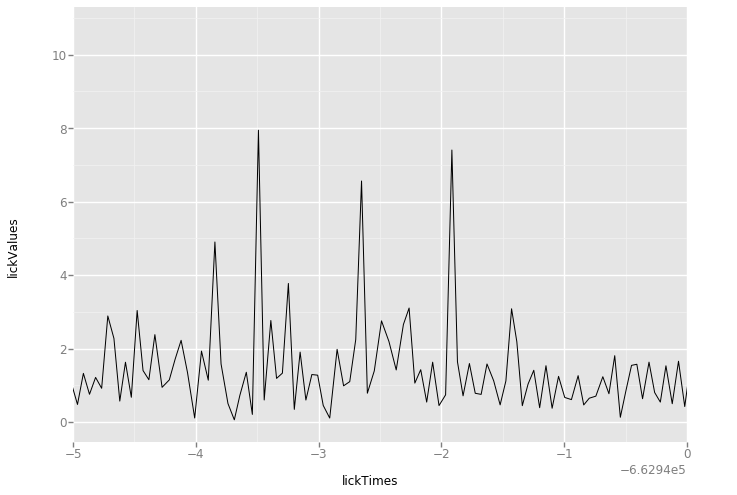

<ggplot: (-9223363256080667143)>

In [445]:
ggplot( aes(x='lickTimes', y='lickValues'), data = Licks_df ) \
    + geom_line() \
    + xlim(-662945, -662940)

In [484]:
#Define a threshold
LickThreshold = 5
#Find maxima
LickMaximaIndex = argrelextrema(np.array(Licks_df['lickValues']), np.greater)
#Select those maxima above that threshold
LickEvents = Licks_df.iloc[LickMaximaIndex]['lickTimes'][Licks_df.iloc[LickMaximaIndex]['lickValues']>LickThreshold]

In [485]:
LickEvents;

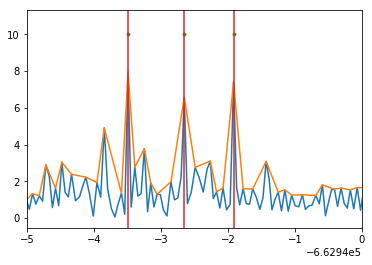

In [487]:
def axvlines(xs, ax=None, **plot_kwargs):
    """
    Draw vertical lines on plot
    :param xs: A scalar, list, or 1D array of horizontal offsets
    :param ax: The axis (or none to use gca)
    :param plot_kwargs: Keyword arguments to be passed to plot
    :return: The plot object corresponding to the lines.
    """
    if ax is None:
        ax = plt.gca()
    xs = np.array((xs, ) if np.isscalar(xs) else xs, copy=False)
    lims = ax.get_ylim()
    x_points = np.repeat(xs[:, None], repeats=3, axis=1).flatten()
    y_points = np.repeat(np.array(lims + (np.nan, ))[None, :], repeats=len(xs), axis=0).flatten()
    plot = ax.plot(x_points, y_points, scaley = False, **plot_kwargs)
    return plot


plt.plot( 'lickTimes', 'lickValues', data = Licks_df)
plt.plot( 'lickTimes', 'lickValues', data = Licks_df.iloc[LickMaximaIndex])
plt.plot(LickEvents,len(LickEvents) * [10],'.')
axvlines(LickEvents)
plt.xlim(-662945, -662940)
plt.show()

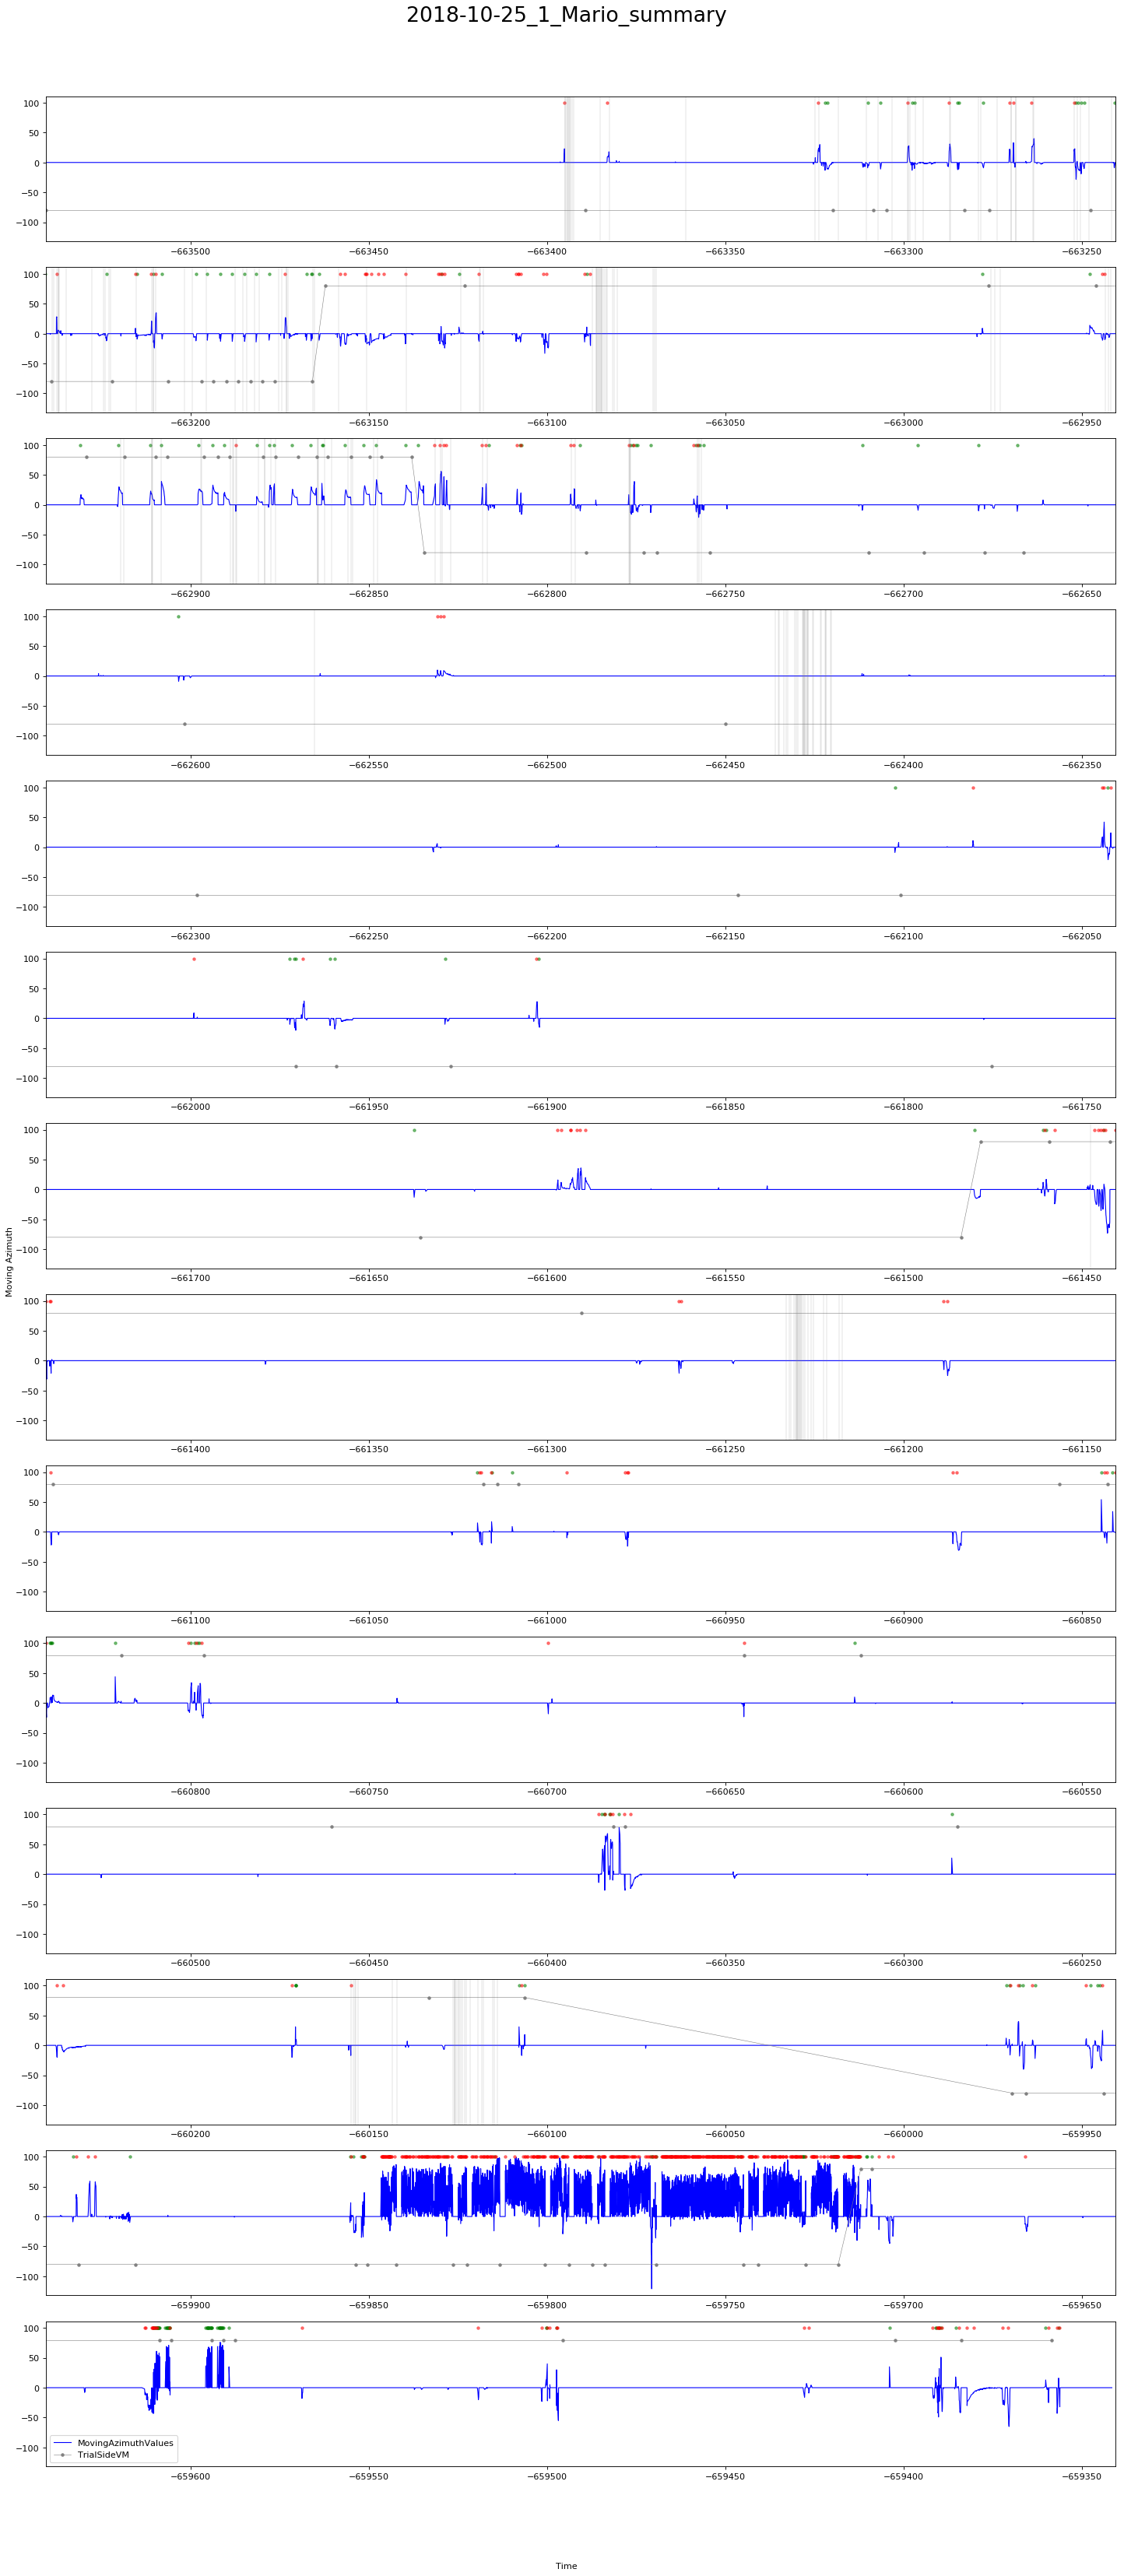

In [524]:
# generate a summary figure of the training
# calculate the number of subplots needed
Subplot_time_length = 300 #5 minutes
InitTime = Behav_df['MovingAzimuthTimes'][0]
FinalTime = Behav_df['MovingAzimuthTimes'][Behav_df.shape[0]-1]
Duration = FinalTime - InitTime
Number_of_subplots = floor(Duration / Subplot_time_length + 1)

fig, axs = plt.subplots(Number_of_subplots, 1, sharey=False, sharex=False, figsize=(18,3*Number_of_subplots), dpi= 80, facecolor='w', edgecolor='k')
for i in range(0, Number_of_subplots):
    axs[i].plot( 'MovingAzimuthTimes', 'MovingAzimuthValues', data = Behav_df, color ='blue', linewidth = 1 )
    axs[i].plot( 'TrialSideTimes', 'TrialSideVM', data = TrialSide_df, color ='grey', marker = '.', linewidth = 0.5 )
    #axs[i].plot( 'TargetReachedTimes', 'TargetReachedVM', data = TargetReached_AboveZero_df, color ='green', marker = '.', linewidth = 0, alpha = 0.5 )
    axs[i].plot(TargetReachedEvents, len(TargetReachedEvents) * [100],'.', color = 'green', alpha = .5)
    #axs[i].plot( 'WrongReachedTimes', 'WrongReachedVM', data = WrongReached_AboveZero_df, color ='red', marker = '.', linewidth = 0, alpha = 0.5 )
    axs[i].plot(WrongReachedEvents, len(WrongReachedEvents) * [100],'.', color = 'red', alpha = .5)
    axs[i].set_xlim( InitTime + (i)*Subplot_time_length, InitTime + (i+1)*Subplot_time_length )
    axvlines(LickEvents, ax = axs[i], linewidth = 0.2, color = 'gray')
axs[i].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(Main_name+'_summary', size = 24)
fig.text(0.5, 0, 'Time', ha='center')
fig.text(0, 0.5, 'Moving Azimuth', va='center', rotation='vertical')
plt.show()

In [525]:
fig.savefig('plots/'+Main_name+'_summary.pdf', transparent=True)